In [1]:
import sys
from pathlib import Path

main_path = Path().absolute().parent
sys.path.append(str(main_path))

import seaborn as sns
import matplotlib.pyplot as plt

import shap
import numpy as np
import pandas as pd
from IPython.display import display

from fge import Dataset, ModelBuilder, TreeBuilder
shap.initjs()

# Adult Dataset

In [2]:
seed = 8
dataset = Dataset(dataset_name='adult', data_folder='../data', seed=seed)
model_builder = ModelBuilder()
results = model_builder.train(dataset, eta=0.3, max_depth=8, subsample=1.0, seed=seed, num_rounds=200)

performance = results['score']
model = results['model']
print(f'test performance is {performance:.4f}')

tree_builder = TreeBuilder(model, dataset, original_score=performance)
# X_train, y_train, X_test, y_test = dataset.data['X_train'], dataset.data['y_train'], dataset['X_test'], dataset['y_test']
# feature_names = dataset.feature_names
# explainer = shap.TreeExplainer(model)
# shap_values = explainer(X_train)
# shap_interaction_values = explainer.shap_interaction_values(X_train)

[0]	test-logloss:0.53761
[40]	test-logloss:0.27630
[80]	test-logloss:0.28102
[120]	test-logloss:0.28647
[160]	test-logloss:0.29231
[199]	test-logloss:0.29741
test performance is 0.8674


In [3]:
group_id = None
shap_interactions = tree_builder.shap_interaction_values(group_id=group_id)

Getting Interaction Values via SHAP package, might take a while...
Processing: # of data = 29304, # of features = 12
Cost time: 1 mins 19.76 secs


In [4]:
# get tree from all train dataset
tree = tree_builder.build(
    score_method='abs', 
    shap_interactions=shap_interactions, 
    n_select=5,
    r_filter=0.5,
    max_iter=None,
    rt_only_best=True
)
img = tree.show_tree(feature_names=dataset.feature_names)

Building Tree: 100%|██████████| 12/12 [00:30<00:00,  2.54s/it]


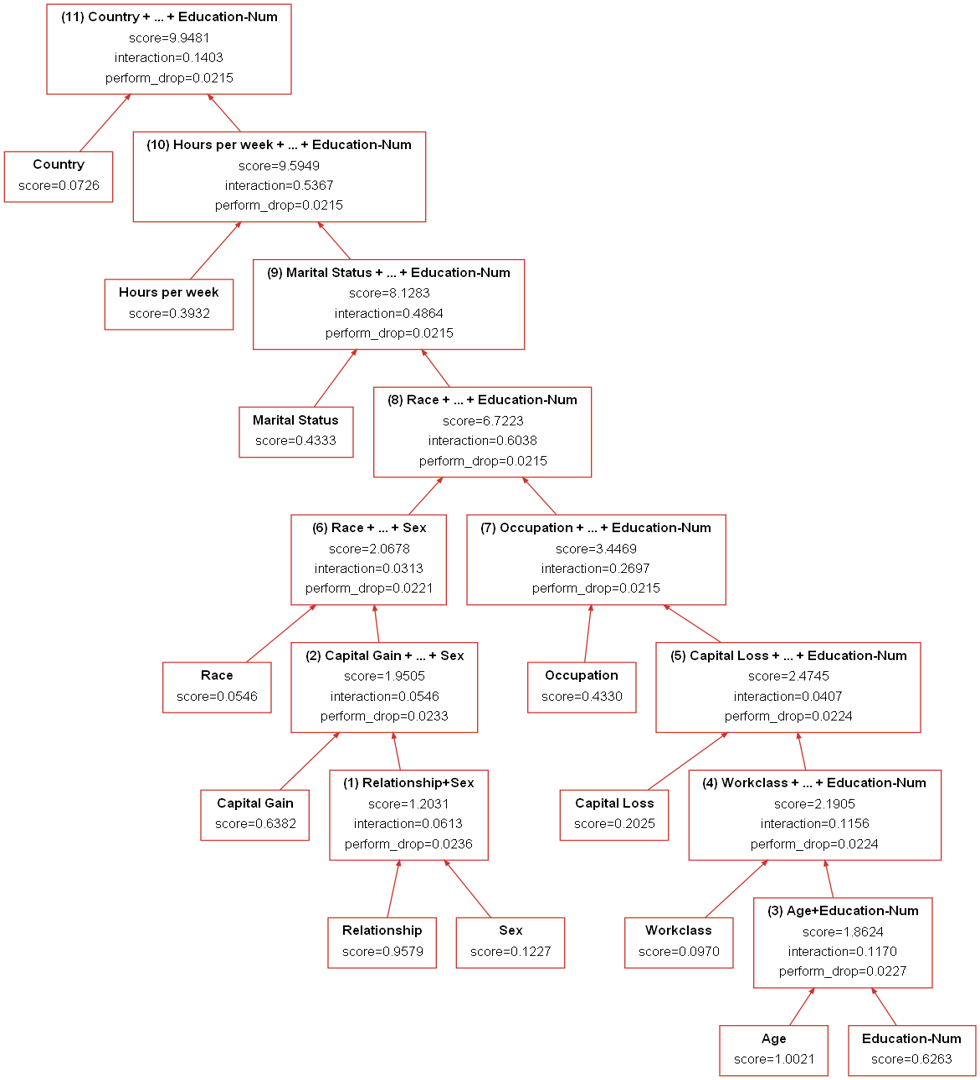

In [15]:
display(img.resize((980, 1080)))

## Group with labels equals to 0

In [3]:
# get tree from group 0
group_id = 0
shap_interactions = tree_builder.shap_interaction_values(group_id=group_id)

Getting Interaction Values via SHAP package, might take a while...
Processing: # of data = 22230, # of features = 12
Cost time: 0 mins 58.16 secs


In [4]:
tree = tree_builder.build(
    score_method='abs', 
    shap_interactions=shap_interactions, 
    n_select=5,
    r_filter=0.5,
    max_iter=None,
    rt_only_best=True
)
img = tree.show_tree(feature_names=dataset.feature_names)

Building Tree: 100%|██████████| 12/12 [00:30<00:00,  2.56s/it]


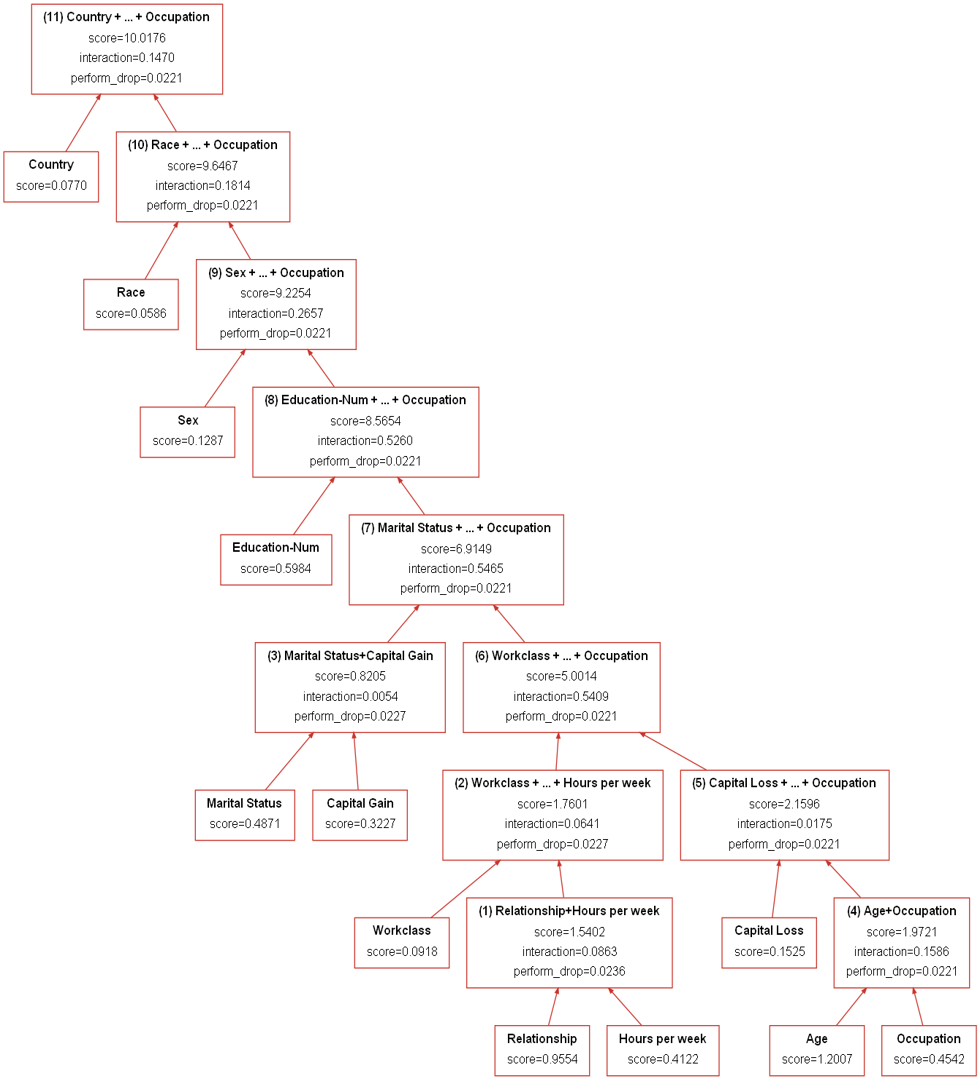

In [5]:
display(img.resize((980, 1080)))

## Group with labels equals to 1

In [6]:
# get tree from group 0
group_id = 1
shap_interactions = tree_builder.shap_interaction_values(group_id=group_id)

Getting Interaction Values via SHAP package, might take a while...
Processing: # of data = 7074, # of features = 12
Cost time: 0 mins 19.56 secs


In [7]:
tree = tree_builder.build(
    score_method='abs', 
    shap_interactions=shap_interactions, 
    n_select=5,
    r_filter=0.5,
    max_iter=None,
    rt_only_best=True
)
img = tree.show_tree(feature_names=dataset.feature_names)

Building Tree: 100%|██████████| 12/12 [00:28<00:00,  2.40s/it]


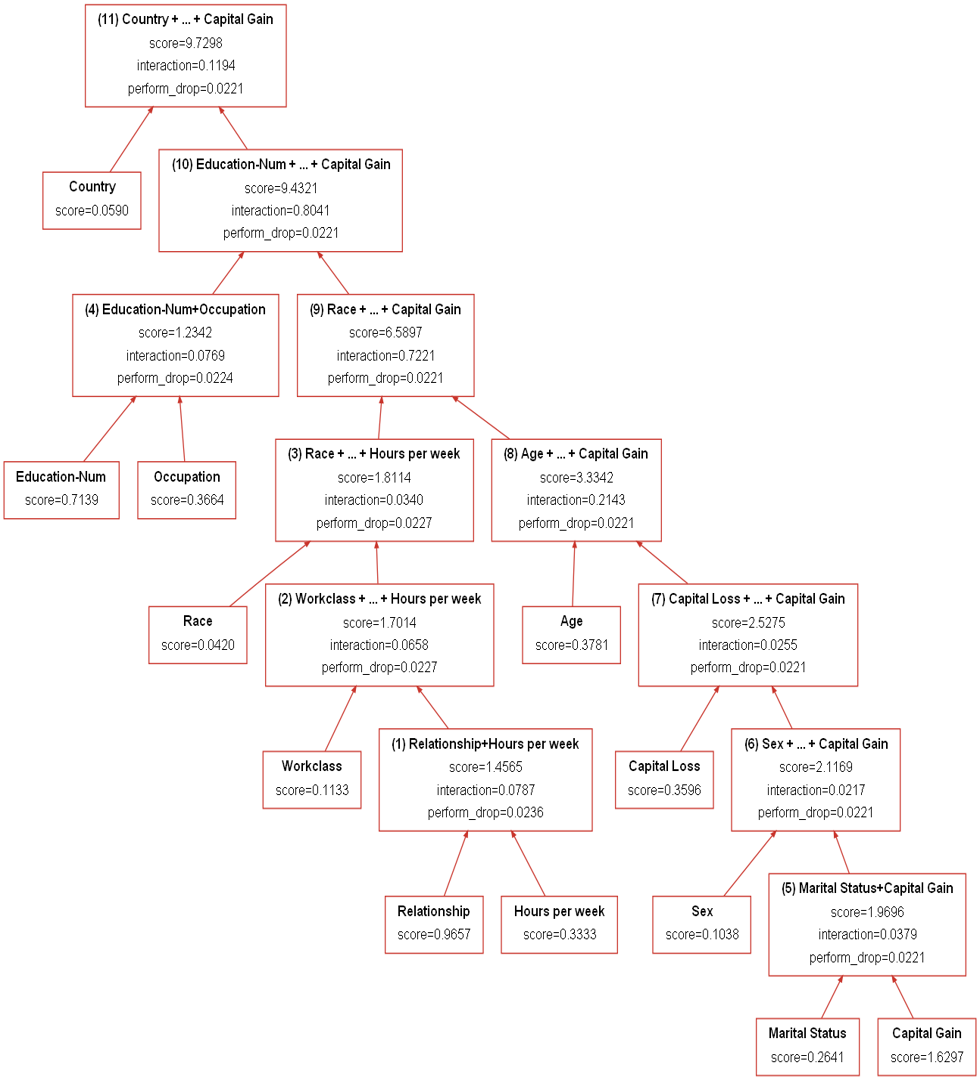

In [8]:
display(img.resize((980, 1080)))

* what is the meaning of larger interaction? 

# California

In [2]:
seed = 8
dataset = Dataset(dataset_name='california', data_folder='../data', seed=seed)
model_builder = ModelBuilder()
results = model_builder.train(dataset, eta=0.3, max_depth=8, subsample=1.0, seed=seed, num_rounds=200)

performance = results['score']
model = results['model']
print(f'test performance is {performance:.4f}')

tree_builder = TreeBuilder(model, dataset, original_score=performance)

[0]	test-rmse:1.43881
[40]	test-rmse:0.46441
[80]	test-rmse:0.45844
[120]	test-rmse:0.45695
[160]	test-rmse:0.45652
[199]	test-rmse:0.45819
test performance is 0.8453


In [5]:
# get tree from group 0
group_id = 0
shap_interactions = tree_builder.shap_interaction_values(group_id=group_id)
tree = tree_builder.build(
    score_method='abs', 
    shap_interactions=shap_interactions, 
    n_select=5,
    r_filter=0.5,
    max_iter=None,
    rt_only_best=True
)
img = tree.show_tree(feature_names=dataset.feature_names)

Getting Interaction Values via SHAP package, might take a while...
Processing: # of data = 4637, # of features = 8
Cost time: 0 mins 17.34 secs


Building Tree: 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]


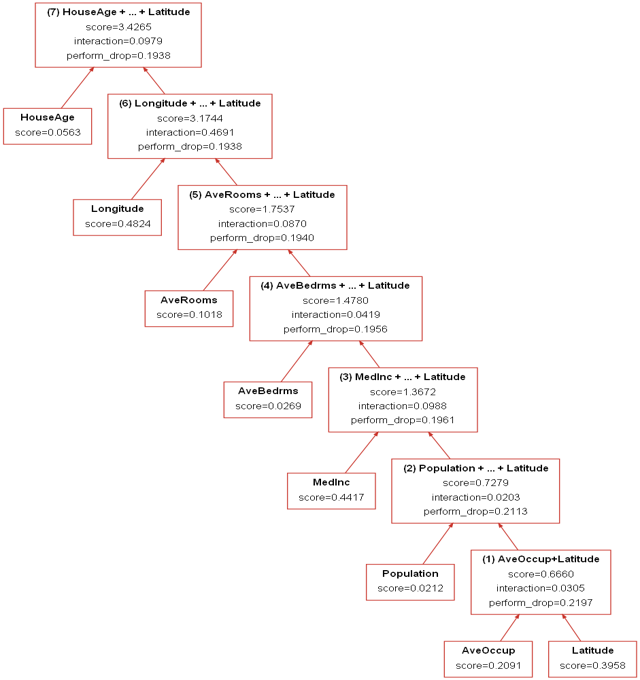

In [9]:
display(img.resize((640, 680)))

In [10]:
# get tree from group 0
group_id = 1
shap_interactions = tree_builder.shap_interaction_values(group_id=group_id)
tree = tree_builder.build(
    score_method='abs', 
    shap_interactions=shap_interactions, 
    n_select=5,
    r_filter=0.5,
    max_iter=None,
    rt_only_best=True
)
img = tree.show_tree(feature_names=dataset.feature_names)

Getting Interaction Values via SHAP package, might take a while...
Processing: # of data = 4618, # of features = 8
Cost time: 0 mins 17.31 secs


Building Tree: 100%|██████████| 8/8 [00:01<00:00,  5.71it/s]


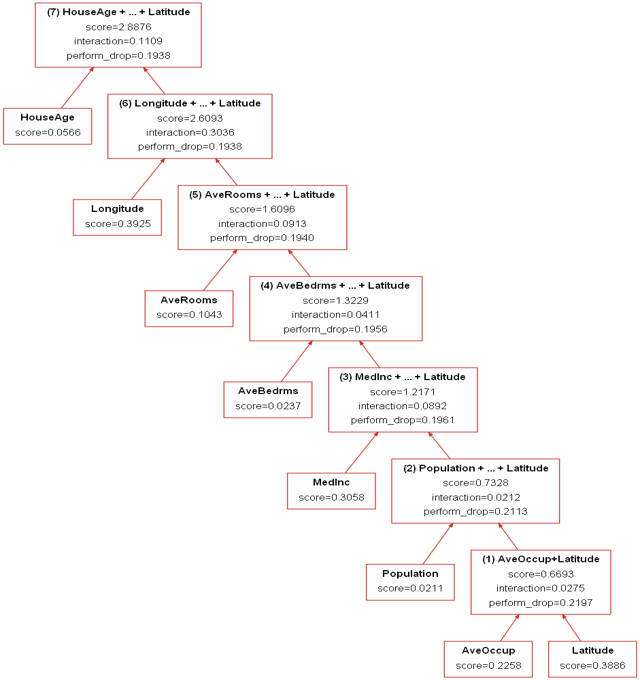

In [11]:
display(img.resize((640, 680)))

In [12]:
# get tree from group 0
group_id = 2
shap_interactions = tree_builder.shap_interaction_values(group_id=group_id)
tree = tree_builder.build(
    score_method='abs', 
    shap_interactions=shap_interactions, 
    n_select=5,
    r_filter=0.5,
    max_iter=None,
    rt_only_best=True
)
img = tree.show_tree(feature_names=dataset.feature_names)

Getting Interaction Values via SHAP package, might take a while...
Processing: # of data = 4687, # of features = 8
Cost time: 0 mins 17.79 secs


Building Tree: 100%|██████████| 8/8 [00:01<00:00,  5.44it/s]


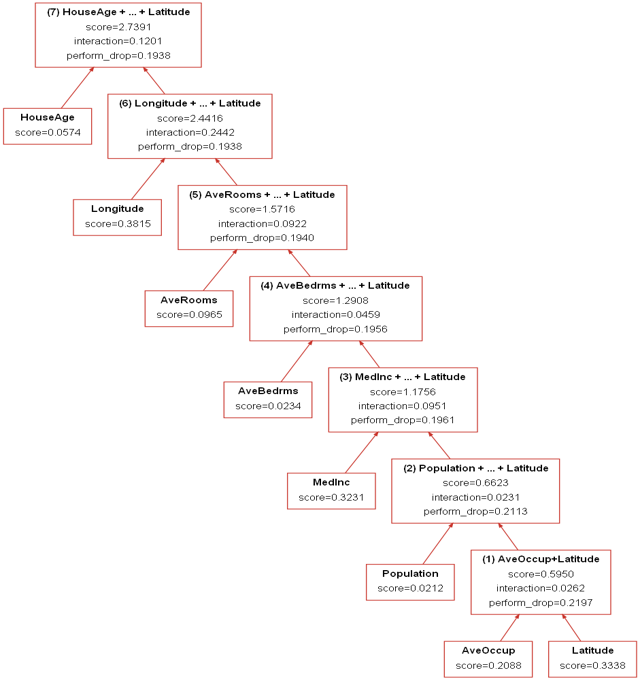

In [13]:
display(img.resize((640, 680)))

# Boston

In [14]:
seed = 8
dataset = Dataset(dataset_name='boston', data_folder='../data', seed=seed)
model_builder = ModelBuilder()
results = model_builder.train(dataset, eta=0.3, max_depth=8, subsample=1.0, seed=seed, num_rounds=200)

performance = results['score']
model = results['model']
print(f'test performance is {performance:.4f}')

tree_builder = TreeBuilder(model, dataset, original_score=performance)

[0]	test-rmse:17.58955
[40]	test-rmse:4.72624
[80]	test-rmse:4.72890
[120]	test-rmse:4.72856
[160]	test-rmse:4.72856
[199]	test-rmse:4.72856


Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datase

test performance is 0.7561


Getting Interaction Values via SHAP package, might take a while...
Processing: # of data = 113, # of features = 13
Cost time: 0 mins 0.27 secs


Building Tree: 100%|██████████| 13/13 [00:00<00:00, 13.14it/s]


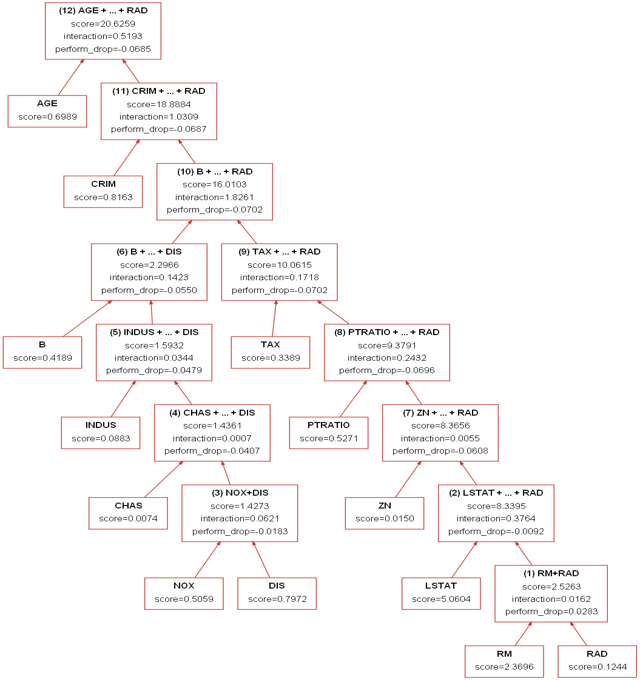

In [16]:
# get tree from group 0
group_id = 0
shap_interactions = tree_builder.shap_interaction_values(group_id=group_id)
tree = tree_builder.build(
    score_method='abs', 
    shap_interactions=shap_interactions, 
    n_select=5,
    r_filter=0.5,
    max_iter=None,
    rt_only_best=True
)
img = tree.show_tree(feature_names=dataset.feature_names)
display(img.resize((640, 680)))

Getting Interaction Values via SHAP package, might take a while...
Processing: # of data = 111, # of features = 13
Cost time: 0 mins 0.26 secs


Building Tree: 100%|██████████| 13/13 [00:00<00:00, 13.03it/s]


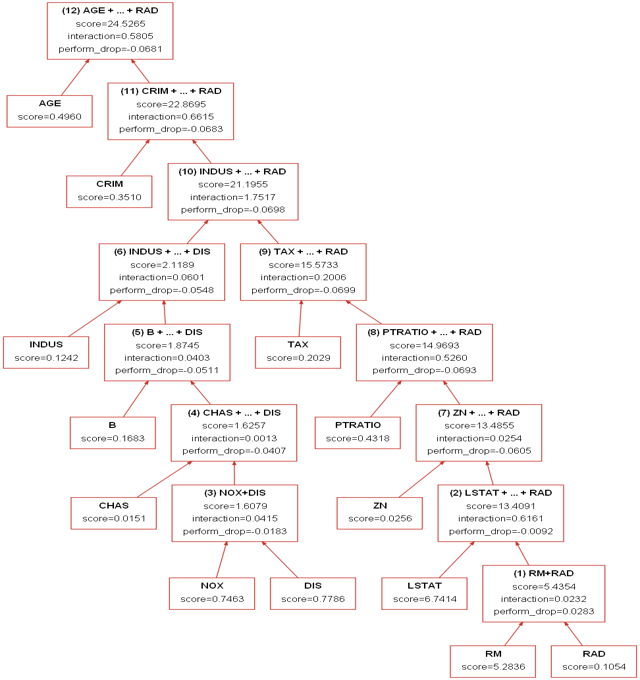

In [18]:
# get tree from group 3
group_id = 3
shap_interactions = tree_builder.shap_interaction_values(group_id=group_id)
tree = tree_builder.build(
    score_method='abs', 
    shap_interactions=shap_interactions, 
    n_select=5,
    r_filter=0.5,
    max_iter=None,
    rt_only_best=True
)
img = tree.show_tree(feature_names=dataset.feature_names)
display(img.resize((640, 680)))

In [ ]:
model_builder = ModelBuilder(
    dataset_name='crime', 
    data_folder='../data', 
    eta=0.3, 
    max_depth=8, 
    subsample=1.0, 
    seed=8
)
results = model_builder.train(num_rounds=200)

performance = results['score']
model = results['model']
dataset = results['dataset']
X_train, y_train, X_test, y_test = dataset['X_train'], dataset['y_train'], dataset['X_test'], dataset['y_test']
print(f'performance is {performance:.4f}')
feature_names = X_train.columns

explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)
shap_interaction_values = explainer.shap_interaction_values(X_test)

In [ ]:
model_builder.dataset['y_train']

In [ ]:
tree_builder = TreeBuilder(
    task_type=model_builder.task_type, 
    original_score=performance, 
    dataset=dataset
)
trees = tree_builder.build(
    score_method='ratio', 
    shap_interactions=shap_interaction_values, 
    n_select=1,
    max_iter=30
)

# nhanesi

In [2]:
seed = 8
dataset = Dataset(dataset_name='nhanesi', data_folder='../data', seed=seed)
model_builder = ModelBuilder()
results = model_builder.train(dataset, eta=0.3, max_depth=8, subsample=1.0, seed=seed, num_rounds=200)

performance = results['score']
model = results['model']
print(f'test performance is {performance:.4f}')

tree_builder = TreeBuilder(model, dataset, original_score=performance)

[0]	test-cox-nloglik:6.58707
[40]	test-cox-nloglik:6.45831
[80]	test-cox-nloglik:6.64152
[120]	test-cox-nloglik:6.73766
[160]	test-cox-nloglik:6.84244
[199]	test-cox-nloglik:7.20182
test performance is 0.7825


In [3]:
# get tree from group 0
group_id = 0
shap_interactions = tree_builder.shap_interaction_values(group_id=group_id)

Getting Interaction Values via SHAP package, might take a while...
Processing: # of data = 2979, # of features = 54
Cost time: 1 mins 1.26 secs


Building Tree:   0%|          | 0/5 [00:00<?, ?it/s]

Current Step: 1: # to run 5


Building Tree:  40%|████      | 2/5 [00:00<00:00,  4.24it/s]

Scores: [-0.0209]
Current Step: 2: # to run 53


Building Tree:  60%|██████    | 3/5 [01:00<00:50, 25.33s/it]

Scores: [-0.0214, -0.0214, -0.0213]
Current Step: 3: # to run 156


Building Tree:  80%|████████  | 4/5 [03:52<01:19, 79.94s/it]

Scores: [-0.0221, -0.0221, -0.0219]
Current Step: 4: # to run 153


Building Tree: 100%|██████████| 5/5 [06:37<00:00, 79.51s/it] 

Scores: [-0.0227, -0.0227, -0.0226]


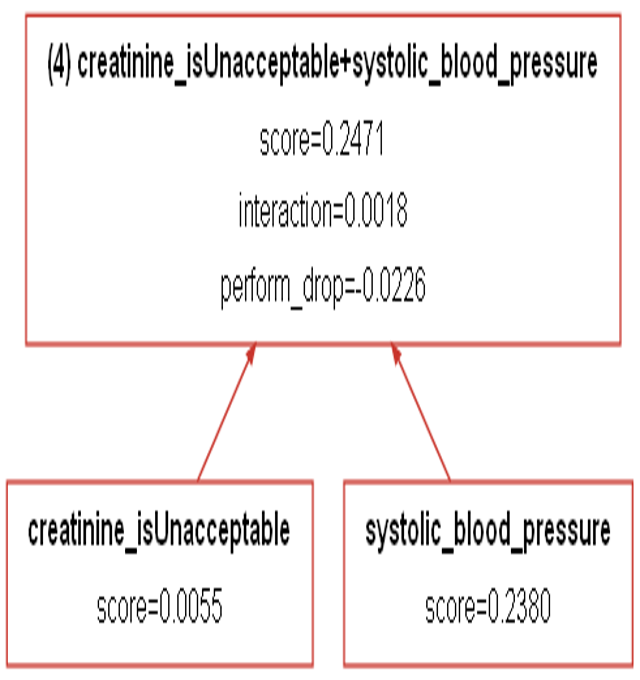

In [4]:
tree = tree_builder.build(
    score_method='abs', 
    shap_interactions=shap_interactions, 
    n_select=3,
    r_filter=0.1,
    max_iter=5,
    rt_only_best=True,
    verbose=True
)
img = tree.show_tree(feature_names=dataset.feature_names)
display(img.resize((640, 680)))

## Debug

In [8]:
from anytree import Node

In [9]:
tree_builder.reset_tree(False)
k=0
g_fn = tree_builder.score_methods['abs']
# feature settings

if shap_interactions.ndim == 3:
    # ndim == 3 case: global tree
    build_global = True
elif shap_interactions.ndim == 2:
    # ndim == 2 case: single tree
    build_global = False
else:
    raise ValueError('number of dimension of `shap_interactions` should be 2 or 3')

siv_scores = g_fn(shap_interactions, build_global)
max_iter = 10
r_diag, c_diag = np.diag_indices(len(tree_builder.feature_names))
main_effect = siv_scores[r_diag, c_diag]
tree_builder.infos[k]['nodes'] = [dict()]
tree_builder.infos[k]['done'] = [set()]
for i, name in enumerate(tree_builder.feature_names):
    tree_builder.infos[k]['nodes'][0][i] = Node(
        name=name, parent=None, score=main_effect[i], interaction=0.0, k=0, drop=0.0
    )

Building Tree:  60%|██████    | 6/10 [07:38<05:05, 76.34s/it]


---

# crime

In [28]:
# get tree from group 3
group_id = 3
shap_interactions = tree_builder.shap_interaction_values(group_id=group_id)
tree = tree_builder.build(
    score_method='abs', 
    shap_interactions=shap_interactions, 
    n_select=5,
    max_iter=None,
    rt_only_best=True
)
img = tree.show_tree(feature_names=dataset.feature_names)
display(img.resize((640, 680)))

(25,)

In [ ]:
tree_builder = TreeBuilder(
    task_type=model_builder.task_type, 
    original_score=performance, 
    dataset=dataset
)
trees = tree_builder.build(
    score_method='ratio', 
    shap_interactions=shap_interaction_values, 
    n_select=1,
    max_iter=30
)

In [ ]:
new_X_train, new_X_test = tree_builder.polyfitter.get_selected_X(tree_builder.infos[0]['nodes'][0], feature_names=tree_builder.feature_names)

In [ ]:
new_X_train.columns[new_X_train.isnull().sum(0) != 0]

In [ ]:
for key, tree in trees:
    print(key)
    display(tree.show_tree(feature_names=feature_names))